In [13]:
# Cell 1 — Imports and settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

# display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)


In [14]:
# Cell 2 — Load the data
df = pd.read_csv("Telco-Customer-Churn.csv")   # update path if needed
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
# Cell 3 — Basic info & preview (columns, dtypes, sample)
print("Columns:", list(df.columns))
print("\nDataframe shape:", df.shape)
display(df.info())
display(df.describe(include='all').T)


Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Dataframe shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSec

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Cell 4 — Fix TotalCharges dtype (common issue)
# TotalCharges may be stored as object; convert to numeric (coerce errors).
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Check how many were coerced to NaN (these are usually customers with tenure=0)
print("TotalCharges nulls after conversion:", df["TotalCharges"].isna().sum())
display(df.loc[df["TotalCharges"].isna(), ["customerID","tenure","MonthlyCharges","TotalCharges"]].head())

# If NaNs exist and correspond to tenure==0, we can set TotalCharges = MonthlyCharges * tenure (or 0)
df.loc[df["TotalCharges"].isna() & (df["tenure"]==0), "TotalCharges"] = 0.0
# re-check
print("Nulls now:", df["TotalCharges"].isna().sum())


TotalCharges nulls after conversion: 11


,customerID,tenure,MonthlyCharges,TotalCharges
488,4472-LVYGI,0,52.55,NaN
753,3115-CZMZD,0,20.25,NaN
936,5709-LVOEQ,0,80.85,NaN
1082,4367-NUYAO,0,25.75,NaN
1340,1371-DWPAZ,0,56.05,NaN


Nulls now: 0


In [17]:
# Cell 5 — Drop or keep customerID
# customerID is an identifier — drop for modeling but keep a copy if needed for reports.
df_ids = df["customerID"].copy()
df = df.drop(columns=["customerID"])


Churn value counts:


Churn
No     5174
Yes    1869
Name: count, dtype: int64


Churn rate (percent):


Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64

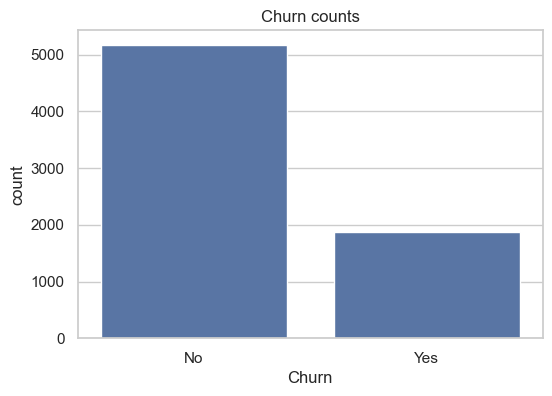

In [18]:
# Cell 6 — Quick target (Churn) check & class balance
print("Churn value counts:")
display(df["Churn"].value_counts())
print("\nChurn rate (percent):")
display(df["Churn"].value_counts(normalize=True).mul(100).round(2))

# Visualize
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df)
plt.title("Churn counts")
plt.show()


,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


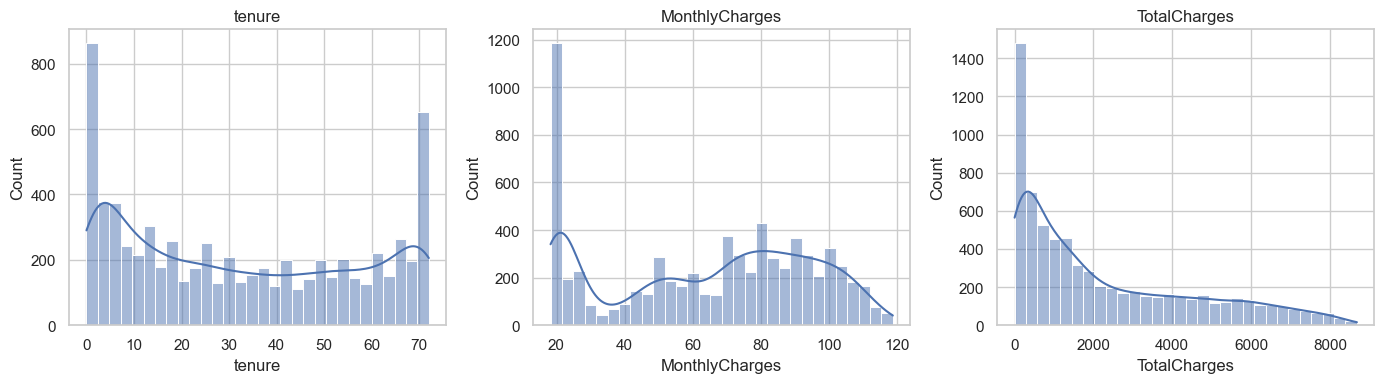

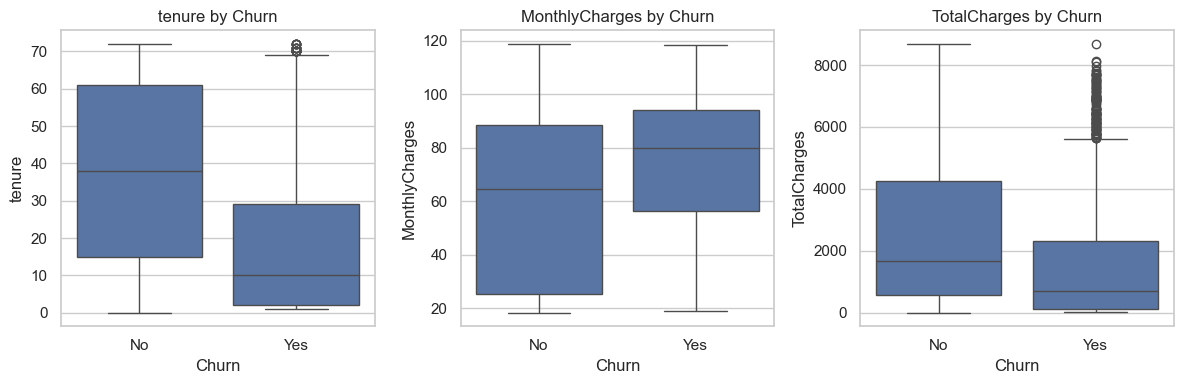

In [19]:
# Cell 7 — Numeric variable summary & histograms
num_cols = ["tenure","MonthlyCharges","TotalCharges"]
display(df[num_cols].describe().T)

plt.figure(figsize=(14,4))
for i, col in enumerate(num_cols,1):
    plt.subplot(1,3,i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

# Boxplots to see outliers vs churn
plt.figure(figsize=(12,4))
for i, col in enumerate(num_cols,1):
    plt.subplot(1,3,i)
    sns.boxplot(x="Churn", y=col, data=df)
    plt.title(f"{col} by Churn")
plt.tight_layout()
plt.show()


In [20]:
# Cell 8 — Categorical feature counts (example features)
cat_cols = ["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines",
            "InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport",
            "StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]
for col in cat_cols:
    print(f"\n== {col} ==")
    display(df[col].value_counts())



== gender ==


gender
Male      3555
Female    3488
Name: count, dtype: int64


== SeniorCitizen ==


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


== Partner ==


Partner
No     3641
Yes    3402
Name: count, dtype: int64


== Dependents ==


Dependents
No     4933
Yes    2110
Name: count, dtype: int64


== PhoneService ==


PhoneService
Yes    6361
No      682
Name: count, dtype: int64


== MultipleLines ==


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


== InternetService ==


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


== OnlineSecurity ==


OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


== OnlineBackup ==


OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


== DeviceProtection ==


DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


== TechSupport ==


TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


== StreamingTV ==


StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


== StreamingMovies ==


StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


== Contract ==


Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


== PaperlessBilling ==


PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


== PaymentMethod ==


PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [21]:
# Cell 9 — Churn rate by categorical features (absolute + percent)
def churn_rate_by(col):
    tab = df.groupby(col)["Churn"].value_counts().unstack().fillna(0)
    tab["total"] = tab.sum(axis=1)
    tab["churn_rate_%"] = (tab["Yes"] / tab["total"] * 100).round(2)
    return tab.sort_values("churn_rate_%", ascending=False)

# Example: Contract
display(churn_rate_by("Contract").head(10))
display(churn_rate_by("PaymentMethod").head(10))
display(churn_rate_by("InternetService").head(10))


Churn,No,Yes,total,churn_rate_%
Contract,,,,
Month-to-month,2220,1655,3875,42.71
One year,1307,166,1473,11.27
Two year,1647,48,1695,2.83


Churn,No,Yes,total,churn_rate_%
PaymentMethod,,,,
Electronic check,1294,1071,2365,45.29
Mailed check,1304,308,1612,19.11
Bank transfer (automatic),1286,258,1544,16.71
Credit card (automatic),1290,232,1522,15.24


Churn,No,Yes,total,churn_rate_%
InternetService,,,,
Fiber optic,1799,1297,3096,41.89
DSL,1962,459,2421,18.96
No,1413,113,1526,7.40


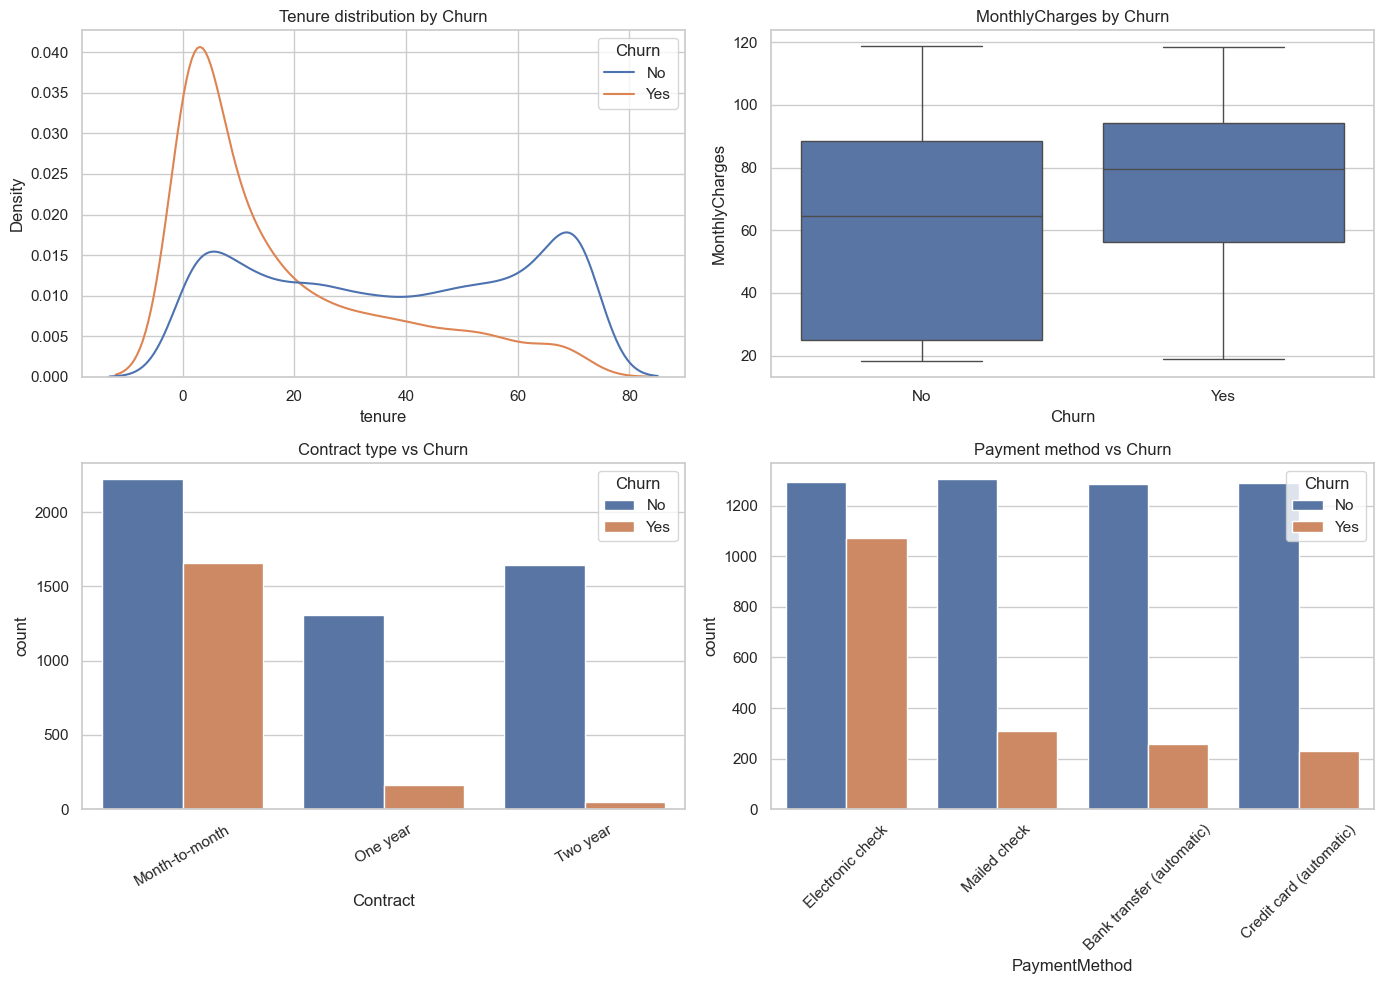

In [22]:
# Cell 10 — Visual bivariate analyses that recruiters like
plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
sns.kdeplot(data=df, x="tenure", hue="Churn", common_norm=False)
plt.title("Tenure distribution by Churn")

plt.subplot(2,2,2)
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("MonthlyCharges by Churn")

plt.subplot(2,2,3)
sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Contract type vs Churn")
plt.xticks(rotation=30)

plt.subplot(2,2,4)
sns.countplot(data=df, x="PaymentMethod", hue="Churn")
plt.title("Payment method vs Churn")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


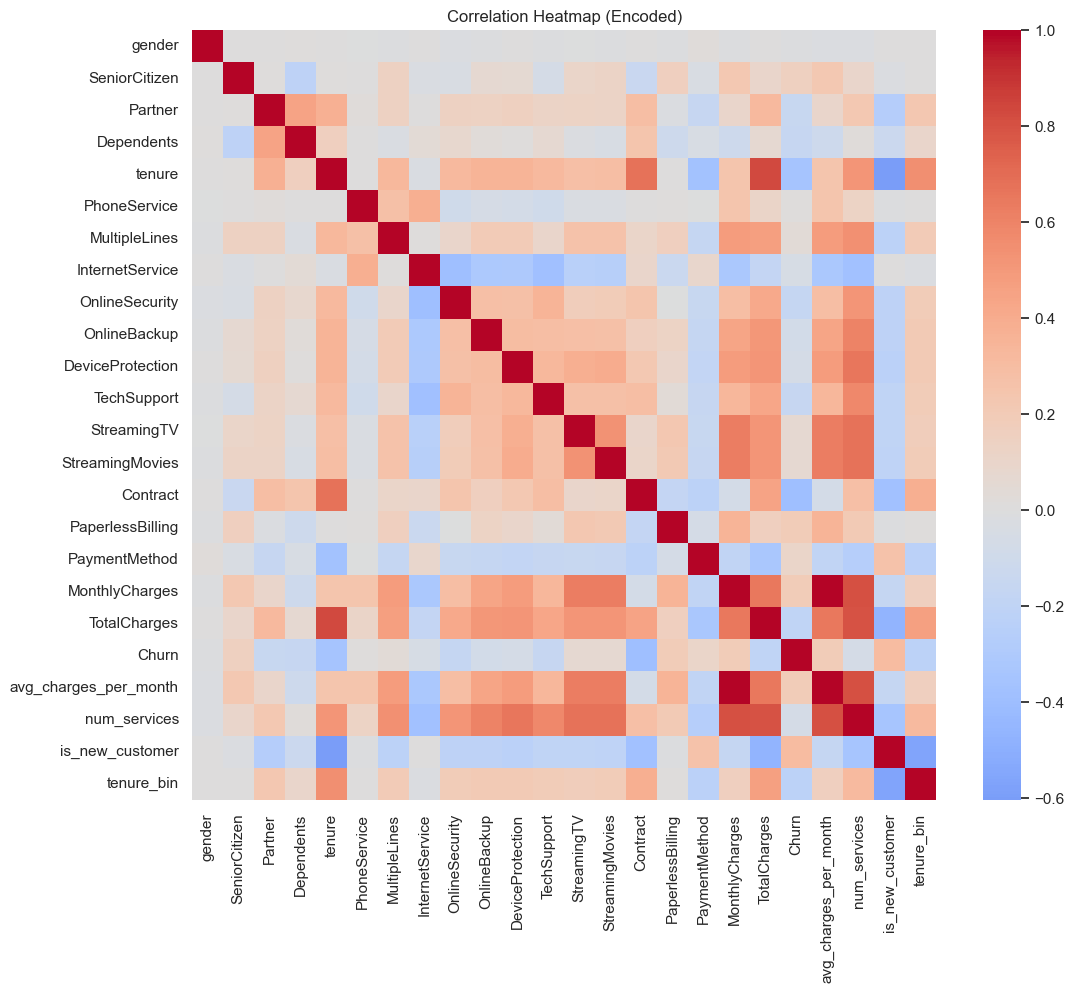

,correlation
Churn,1.000000
is_new_customer,0.308773
MonthlyCharges,0.193356
avg_charges_per_month,0.192531
PaperlessBilling,0.191825
SeniorCitizen,0.150889
PaymentMethod,0.107062
StreamingTV,0.063228
StreamingMovies,0.061382
MultipleLines,0.040102


,Churn
Churn,1.000000
is_new_customer,0.308773
MonthlyCharges,0.193356
avg_charges_per_month,0.192531
PaperlessBilling,0.191825
SeniorCitizen,0.150889
PaymentMethod,0.107062
StreamingTV,0.063228
StreamingMovies,0.061382
MultipleLines,0.040102


,Churn
num_services,-0.067264
OnlineBackup,-0.082255
Partner,-0.150448
Dependents,-0.164221
TechSupport,-0.164674
OnlineSecurity,-0.171226
TotalCharges,-0.198324
tenure_bin,-0.224225
tenure,-0.352229
Contract,-0.396713


In [37]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

corr_df = df.copy()
le = LabelEncoder()
for col in corr_df.select_dtypes(include=["object","category"]).columns:
    corr_df[col] = le.fit_transform(corr_df[col].astype(str))

num_corr_df = corr_df.select_dtypes(include=[np.number]).copy()
corr = num_corr_df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Encoded)")
plt.show()

corr_with_churn = corr["Churn"].sort_values(ascending=False)
display(corr_with_churn.to_frame("correlation").style.background_gradient(cmap="coolwarm"))
display(corr_with_churn.head(10).to_frame())
display(corr_with_churn.tail(10).to_frame())


In [38]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

corr_df = df.copy()
le = LabelEncoder()
for col in corr_df.select_dtypes(include=["object","category"]).columns:
    corr_df[col] = le.fit_transform(corr_df[col].astype(str))

num_corr_df = corr_df.select_dtypes(include=[np.number]).copy()
corr_with_churn = num_corr_df.corr()["Churn"].sort_values(ascending=False)
display(corr_with_churn.to_frame("correlation"))


,correlation
Churn,1.000000
is_new_customer,0.308773
MonthlyCharges,0.193356
avg_charges_per_month,0.192531
PaperlessBilling,0.191825
SeniorCitizen,0.150889
PaymentMethod,0.107062
StreamingTV,0.063228
StreamingMovies,0.061382
MultipleLines,0.040102


In [24]:
# Cell 12 — Feature engineering ideas and creation
# 1) avg_charges_per_month: protect against divide by zero
df["avg_charges_per_month"] = df.apply(lambda r: r["TotalCharges"]/r["tenure"] if r["tenure"]>0 else r["MonthlyCharges"], axis=1)

# 2) number of subscribed services (count of 'Yes' across service columns)
service_cols = ["PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection",
                "TechSupport","StreamingTV","StreamingMovies"]
# Convert 'No phone service' or 'No internet service' to 'No' first
df[service_cols] = df[service_cols].replace({"No phone service":"No", "No internet service":"No"})
df["num_services"] = df[service_cols].apply(lambda row: sum(row == "Yes"), axis=1)

# 3) is_new_customer: tenure < 6 months
df["is_new_customer"] = (df["tenure"] < 6).astype(int)

# 4) tenure bins
df["tenure_bin"] = pd.cut(df["tenure"], bins=[-1,3,6,12,24,48,72], labels=["0-3","4-6","7-12","13-24","25-48","49-72"])

# Inspect new features
display(df[["tenure","tenure_bin","avg_charges_per_month","num_services","is_new_customer"]].head())


,tenure,tenure_bin,avg_charges_per_month,num_services,is_new_customer
0,1,0-3,29.850000,1,1
1,34,25-48,55.573529,3,0
2,2,0-3,54.075000,3,1
3,45,25-48,40.905556,3,0
4,2,0-3,75.825000,1,1


In [25]:
# Cell 13 — Churn rate by engineered features
display(churn_rate_by("tenure_bin"))
display(churn_rate_by("num_services").head(10))
display(pd.crosstab(df["is_new_customer"], df["Churn"], normalize="index").mul(100).round(2))


C:\Users\rupes\AppData\Local\Temp\ipykernel_38892\443642090.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tab = df.groupby(col)["Churn"].value_counts().unstack().fillna(0)


Churn,No,Yes,total,churn_rate_%
tenure_bin,,,,
0-3,465,597,1062,56.21
4-6,232,187,419,44.63
7-12,452,253,705,35.89
13-24,730,294,1024,28.71
25-48,1269,325,1594,20.39
49-72,2026,213,2239,9.51


Churn,No,Yes,total,churn_rate_%
num_services,,,,
0,45,35,80,43.75
3,613,352,965,36.48
2,798,390,1188,32.83
4,633,289,922,31.34
5,676,232,908,25.55
6,524,152,676,22.49
1,1342,359,1701,21.11
7,346,49,395,12.41
8,197,11,208,5.29


Churn,No,Yes
is_new_customer,,
0,80.17,19.83
1,45.73,54.27


In [26]:
# Cell 14 — Customer segmentation examples (pivot tables)
# 1) Contract vs Churn rate
pivot1 = pd.pivot_table(df, values="Churn", index="Contract", columns=None,
                        aggfunc=lambda x: (x=="Yes").sum()/len(x)).round(3)
pivot1["churn_rate_%"] = pivot1["Churn"] * 100
display(pivot1.sort_values("churn_rate_%", ascending=False))

# 2) PaymentMethod + Contract combined churn rates
combo = df.groupby(["Contract","PaymentMethod"])["Churn"].apply(lambda x: (x=="Yes").mean()).reset_index()
combo.columns = ["Contract","PaymentMethod","churn_rate"]
combo["churn_rate_%"] = (combo["churn_rate"]*100).round(2)
display(combo.sort_values("churn_rate_%", ascending=False).head(15))


,Churn,churn_rate_%
Contract,,
Month-to-month,0.427,42.7
One year,0.113,11.3
Two year,0.028,2.8


,Contract,PaymentMethod,churn_rate,churn_rate_%
2,Month-to-month,Electronic check,0.537297,53.73
0,Month-to-month,Bank transfer (automatic),0.341256,34.13
1,Month-to-month,Credit card (automatic),0.327808,32.78
3,Month-to-month,Mailed check,0.315789,31.58
6,One year,Electronic check,0.184438,18.44
5,One year,Credit card (automatic),0.103015,10.30
4,One year,Bank transfer (automatic),0.097187,9.72
10,Two year,Electronic check,0.077381,7.74
7,One year,Mailed check,0.068249,6.82
8,Two year,Bank transfer (automatic),0.033688,3.37


In [27]:
# Cell 15 — Check duplicates, outliers, and sanity checks
print("Duplicates:", df.duplicated().sum())

# Outlier checks (extreme MonthlyCharges)
display(df.sort_values("MonthlyCharges", ascending=False).head(10))
display(df[df["MonthlyCharges"]>100].shape)   # example threshold


Duplicates: 22


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,avg_charges_per_month,num_services,is_new_customer,tenure_bin
4586,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No,120.450694,8,0,49-72
2115,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.60,No,119.402817,8,0,49-72
3894,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No,117.500735,8,0,49-72
4804,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.70,No,120.749180,8,0,49-72
5127,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,Yes,116.479851,8,0,49-72
6118,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No,118.710417,8,0,49-72
4610,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.80,Yes,120.622222,8,0,49-72
3205,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),117.60,8308.90,No,115.401389,8,0,49-72
6768,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.10,No,120.418056,8,0,49-72
4875,Female,1,Yes,No,48,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,No,Electronic check,117.45,5438.90,Yes,113.310417,8,0,25-48


(902, 24)

In [28]:
# Cell 16 — Save processed data for modelling / dashboard
df.to_csv("telco_churn_processed_for_modeling.csv", index=False)
print("Saved processed file: telco_churn_processed_for_modeling.csv")


Saved processed file: telco_churn_processed_for_modeling.csv


In [29]:
# Cell 17 — Short plain-English summary (printable)
def summary_insights(dataframe):
    n = len(dataframe)
    churn_rate = (dataframe["Churn"]=="Yes").mean()*100
    print(f"Dataset has {n} rows. Overall churn rate = {churn_rate:.2f}%.\n")
    print("Top actionable signals from EDA (initial):")
    print("- Month-to-month contracts show the highest churn.")
    print("- New customers (tenure < 6 months) have much higher churn.")
    print("- Higher MonthlyCharges are correlated with higher churn.")
    print("- Lack of support services (OnlineSecurity, TechSupport) increases churn.")
    print("- Customers paying by Electronic check show elevated churn rates.")
    
summary_insights(df)


Dataset has 7043 rows. Overall churn rate = 26.54%.

Top actionable signals from EDA (initial):
- Month-to-month contracts show the highest churn.
- New customers (tenure < 6 months) have much higher churn.
- Higher MonthlyCharges are correlated with higher churn.
- Lack of support services (OnlineSecurity, TechSupport) increases churn.
- Customers paying by Electronic check show elevated churn rates.


In [30]:
# Cell 18 — Next steps checklist (for notebook)
next_steps = [
 "Create one-hot encoding / embeddings for categorical vars (Contract, PaymentMethod, InternetService, etc.)",
 "Try baseline models (Logistic Regression, RandomForest, XGBoost) and record AUC, precision, recall",
 "Build TensorFlow model with embeddings for high-cardinality categories",
 "Use stratified train-test split and cross-validation",
 "Use class weights or SMOTE if needed (based on churn imbalance)",
 "Create SHAP explainability plots for top models",
 "Build Tableau dashboards using: churn rate by tenure_bin, contract, payment method, and service bundle",
 "Create Streamlit app for model predictions + what-if analysis",
]
for i,s in enumerate(next_steps,1):
    print(i,"-", s)


1 - Create one-hot encoding / embeddings for categorical vars (Contract, PaymentMethod, InternetService, etc.)
2 - Try baseline models (Logistic Regression, RandomForest, XGBoost) and record AUC, precision, recall
3 - Build TensorFlow model with embeddings for high-cardinality categories
4 - Use stratified train-test split and cross-validation
5 - Use class weights or SMOTE if needed (based on churn imbalance)
6 - Create SHAP explainability plots for top models
7 - Build Tableau dashboards using: churn rate by tenure_bin, contract, payment method, and service bundle
8 - Create Streamlit app for model predictions + what-if analysis


In [32]:
df.corr(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,avg_charges_per_month,num_services,is_new_customer
SeniorCitizen,1.000000,0.016567,0.220173,0.103006,0.217917,0.095946,-0.017808
tenure,0.016567,1.000000,0.247900,0.826178,0.247234,0.523600,-0.603413
MonthlyCharges,0.220173,0.247900,1.000000,0.651174,0.996244,0.802322,-0.166205
TotalCharges,0.103006,0.826178,0.651174,1.000000,0.651025,0.795854,-0.466931
avg_charges_per_month,0.217917,0.247234,0.996244,0.651025,1.000000,0.800366,-0.165027
num_services,0.095946,0.523600,0.802322,0.795854,0.800366,1.000000,-0.343936
is_new_customer,-0.017808,-0.603413,-0.166205,-0.466931,-0.165027,-0.343936,1.000000


In [35]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,avg_charges_per_month,num_services,is_new_customer,tenure_bin
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.850000,1,1,0-3
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,55.573529,3,0,25-48
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,54.075000,3,1,0-3
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,40.905556,3,0,25-48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,75.825000,1,1,0-3


In [34]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'avg_charges_per_month',
       'num_services', 'is_new_customer', 'tenure_bin'],
      dtype='object')

In [1]:
X_telco = df_telco_processed[FEATURE_COLUMNS]
Xt = scaler.fit_transform(X_telco)


NameError: name 'df_telco_processed' is not defined